# Week 6. Stochastic gradient descent model

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. Stochastic gradient descent

In [108]:
def derivative(x, y):  # derivative of objective function
    return asarray([x * 2.0, y * 2.0])

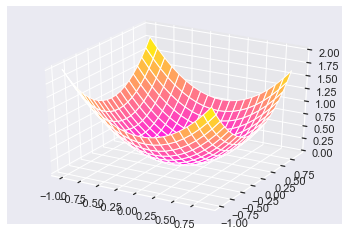

In [109]:
from numpy import arange
from numpy import meshgrid
 
def objective(x, y):  # objective function
    return x**2.0 + y**2.0
 
r_min, r_max = -1.0, 1.0 # define range for input
xaxis = arange(r_min, r_max, 0.1); yaxis = arange(r_min, r_max, 0.1) # sample input range uniformly at 0.1 increments
x, y = meshgrid(xaxis, yaxis) # create a mesh from the axis
results = objective(x, y) # compute targets
figure = plt.figure() # create a surface plot with the jet color scheme
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='spring'); plt.show()

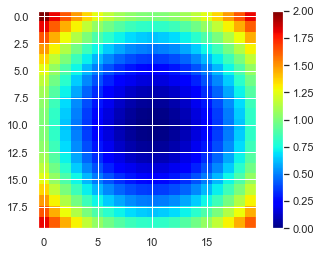

In [110]:
plt.imshow(results, cmap='jet'); plt.colorbar()

In [111]:
import pandas as pd
data = pd.DataFrame({'x': [1,2,4,3,5], 'y':[1,3,3,2,5]})
data

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


max_iter을 5, 10, 15, 20으로 fitting 

SGDRegressor(max_iter=30)

SGDRegressor(max_iter=30)

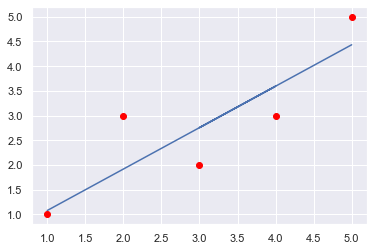

In [112]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=30)                  # 1. 모델 객체화 (max_iter --> aka epochs)
model.fit(data['x'].values.reshape(-1,1), data['y'])                                      # 2. 학습하기

model                                            #  학습한 모델 내부 저장
y_pred = model.predict(data['x'].values.reshape(-1,1)) #  
plt.scatter(data['x'], data['y'], color='red')
plt.plot(data['x'], y_pred)

## 알고리즘 (fit, predict) 비교
#### 데이터 불러오기

In [113]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [114]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.feature_names.extend(housing.target_names)
df = pd.DataFrame(np.c_[housing.data, housing.target], columns = housing.feature_names)
#df=df.sample(frac=0.1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [115]:
df.corr()[-1:]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.02465,-0.023737,-0.14416,-0.045967,1.0


In [116]:
X = df[['MedInc', 'AveRooms']]
y = df['MedHouseVal']

## 3. Stochastic gradient descent

In [117]:
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
from sklearn.linear_model import SGDRegressor       # 알고리즘 불러오고 데이터 준비하기
model = SGDRegressor(max_iter=500)                  # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      #  2. 학습하기
model.get_params()                                                #  학습한 모델 내부 저장
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
print(f'모델의 Mean squared error는 :{mean_squared_error(y, y_pred).round(4)}')

model.coef_
model.intercept_

SGDRegressor(max_iter=500)

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 500,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

모델의 Mean squared error는 :0.7435


array([ 0.41671399, -0.06033515])

array([0.57099093])

<Figure size 576x432 with 0 Axes>

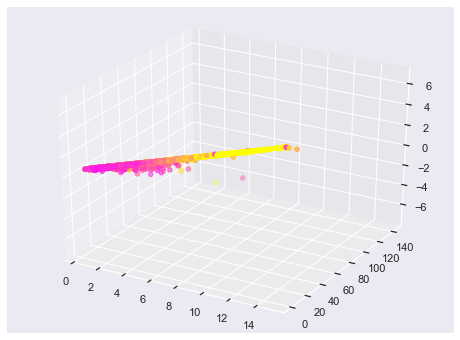

In [119]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X['MedInc'], X['AveRooms'], y_pred, c=y, cmap='spring')
ax.view_init()  # 그림의 각도 250도

## 2. Regression (scikit learn API)

In [120]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False) # #print('Intercept: \n', reg.intercept_)

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

LinearRegression(fit_intercept=False)

Coefficients: 
 [0.49376576 0.01487299]
Mean squared error: 0.74
Coefficient of determination: 0.45


## 1. Ordinary Least Squares (statisitc models API)

In [121]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          6.805e+04
Date:                Tue, 06 Apr 2021   Prob (F-statistic):                        0.00
Time:                        09:28:04   Log-Likelihood:                         -26162.
No. Observations:               20640   AIC:                                  5.233e+04
Df Residuals:                   20638   BIC:                                  5.234e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 중간고사 문제

In [122]:
df = pd.DataFrame(np.c_[housing.data, housing.target], columns = housing.feature_names)
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


### StandardScaler

### Minmax

### Robust

### Stochastic gradient descent

In [126]:
X = df[['MedInc', 'AveRooms']]
y = df['MedHouseVal']

## 자료 표준화의 중요성

### 데이터 불러오기

In [132]:
from sklearn.datasets import load_digits
data = load_digits()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target
X.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


### 표준화없이 분류(classification)

### 표준화이후 분류(classification)

## 참고 1) 타이타닉 자료에 표준화 전후 예측 결과 비교

In [155]:
df = pd.read_csv('../data/train.csv')
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.dropna(inplace=True)

## Method of correlation:
* pearson (default)
* kendall
* spearman

## <font color='red'> Syntax: pandas.get_dummies()
pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

### (1) 표준화 없이 예측

### (2) 표준화후 예측

### (3) 더미변수 제외하고 표준화후 예측

### (4) 인디안 당뇨병 자료

In [182]:
df= pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 참고 2) 데이터의 특성에 따라 예측을 잘하는 알고리즘이 있음

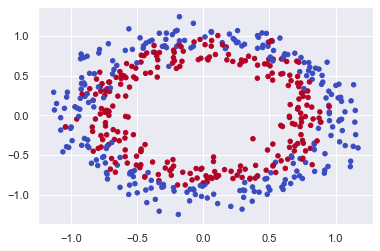

In [19]:
from sklearn.datasets import make_blobs, make_circles, make_moons
#X, y = make_blobs(n_samples=5000, centers=2, random_state=0, cluster_std=0.60)
#X, y = make_moons(n_samples=500, noise=0.1)
X, y = make_circles(n_samples=500, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');

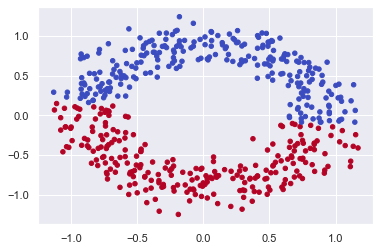

In [20]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000)                  # 1. 모델 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      # 2. 학습하기 
y_pred = model.predict(X) # 
y_pred
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='coolwarm');

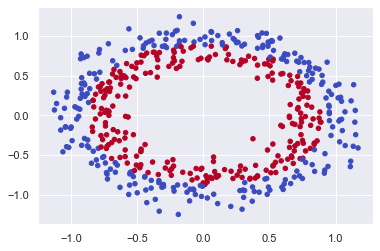

In [21]:
from sklearn.svm import SVC 
model = SVC(kernel='rbf')
model.fit(X, y)
y_pred = model.predict(X) # 
y_pred
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='coolwarm');

## End